# Introduction

The field of data analysis offers powerful tools to uncover patterns and make informed predictions based on historical data. In this project, we aim to leverage data analysis techniques to predict the future careers of computer science students. By examining a variety of metrics, including GPA, proficiency in programming languages, and interested domain, we seek to identify key factors that influence a student's career trajectory. This analysis not only helps in predicting career outcomes but also provides valuable insights that can guide educational strategies and career counseling efforts for students in the computer science discipline.

### Objectves:

1. **Predict Future Career Paths**: The primary objective of this project is to predict the most likely future career path for computer science students based on key metrics such as GPA, proficiency in programming languages (Python, SQL, Java), and their interest domains. By understanding how these factors correlate with different career outcomes, we can provide data-driven career guidance to students.

2. **Analyze the Impact of Project Experience**: Another objective of this project is to analyze the impact of project experience on career outcomes. We aim to investigate how the type and number of projects completed by students influence their future career paths. This analysis will help identify the importance of practical experience in shaping career trajectories.

3. **Examine Gender-Based Career Trends**: A third objective is to examine potential gender-based trends in career outcomes. By analyzing the data for patterns related to gender, we can identify whether certain career paths are more common among male or female students, and explore the underlying reasons for these trends. This analysis will contribute to understanding and addressing any gender disparities in career outcomes within the computer science field. 

# Visualisation


In [26]:
# import necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# load dataframe
df = pd.read_csv("./cs_students.csv")

In [27]:
from ipywidgets import interactive, IntSlider, Dropdown, Text, VBox, HBox, interact

# Function to display a slice of the DataFrame with filtering
def display_df(index=0, rows=10, column_filter=''):
    filtered_df = df
    if column_filter:
        # Apply filter across all columns, case-insensitive
        filtered_df = df[df.apply(lambda row: row.astype(str).str.contains(column_filter, case=False).any(), axis=1)]
    display(filtered_df.iloc[index:index+rows])

# Widgets for interaction
index_slider = IntSlider(min=0, max=len(df)-10, step=10, description='Start Index')
row_slider = IntSlider(min=1, max=100, step=1, value=10, description='Rows')
column_filter = Text(value='', description='Filter')

# Interactive widget
interact(display_df, index=index_slider, rows=row_slider, column_filter=column_filter)

interactive(children=(IntSlider(value=0, description='Start Index', max=170, step=10), IntSlider(value=10, des…

<function __main__.display_df(index=0, rows=10, column_filter='')>

In [28]:
px.histogram(df, x="GPA", color="Gender", marginal="box", title="GPA Distribution by Gender")

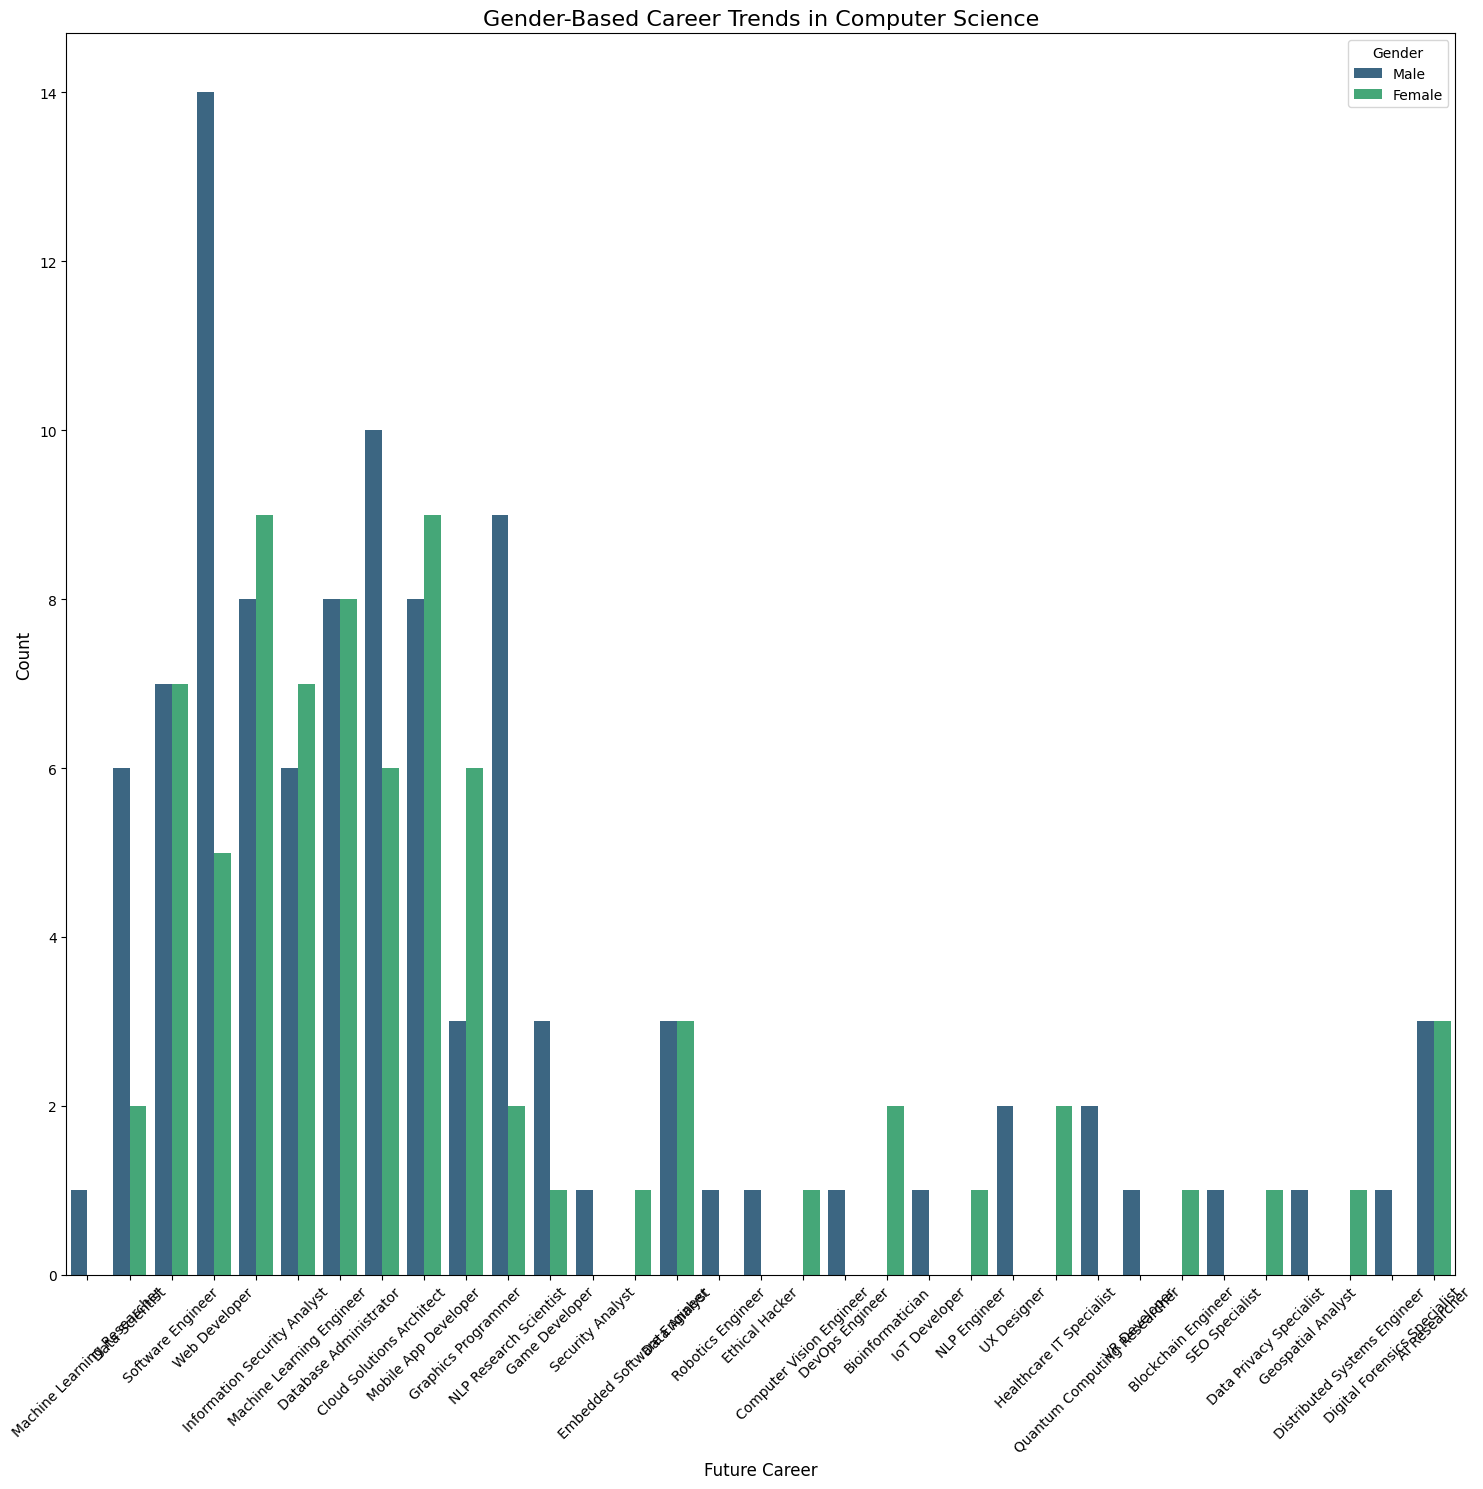

In [29]:
# Create a bar chart using seaborn
plt.figure(figsize=(15, 15))
sns.countplot(x='Future Career', hue='Gender', data=df, palette='viridis')

# Add titles and labels
plt.title('Gender-Based Career Trends in Computer Science', fontsize=16)
plt.xlabel('Future Career', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [30]:
px.bar(df, x="Interested Domain", color="Future Career", title="Future Career Choices by Interested Domain", barmode="group")

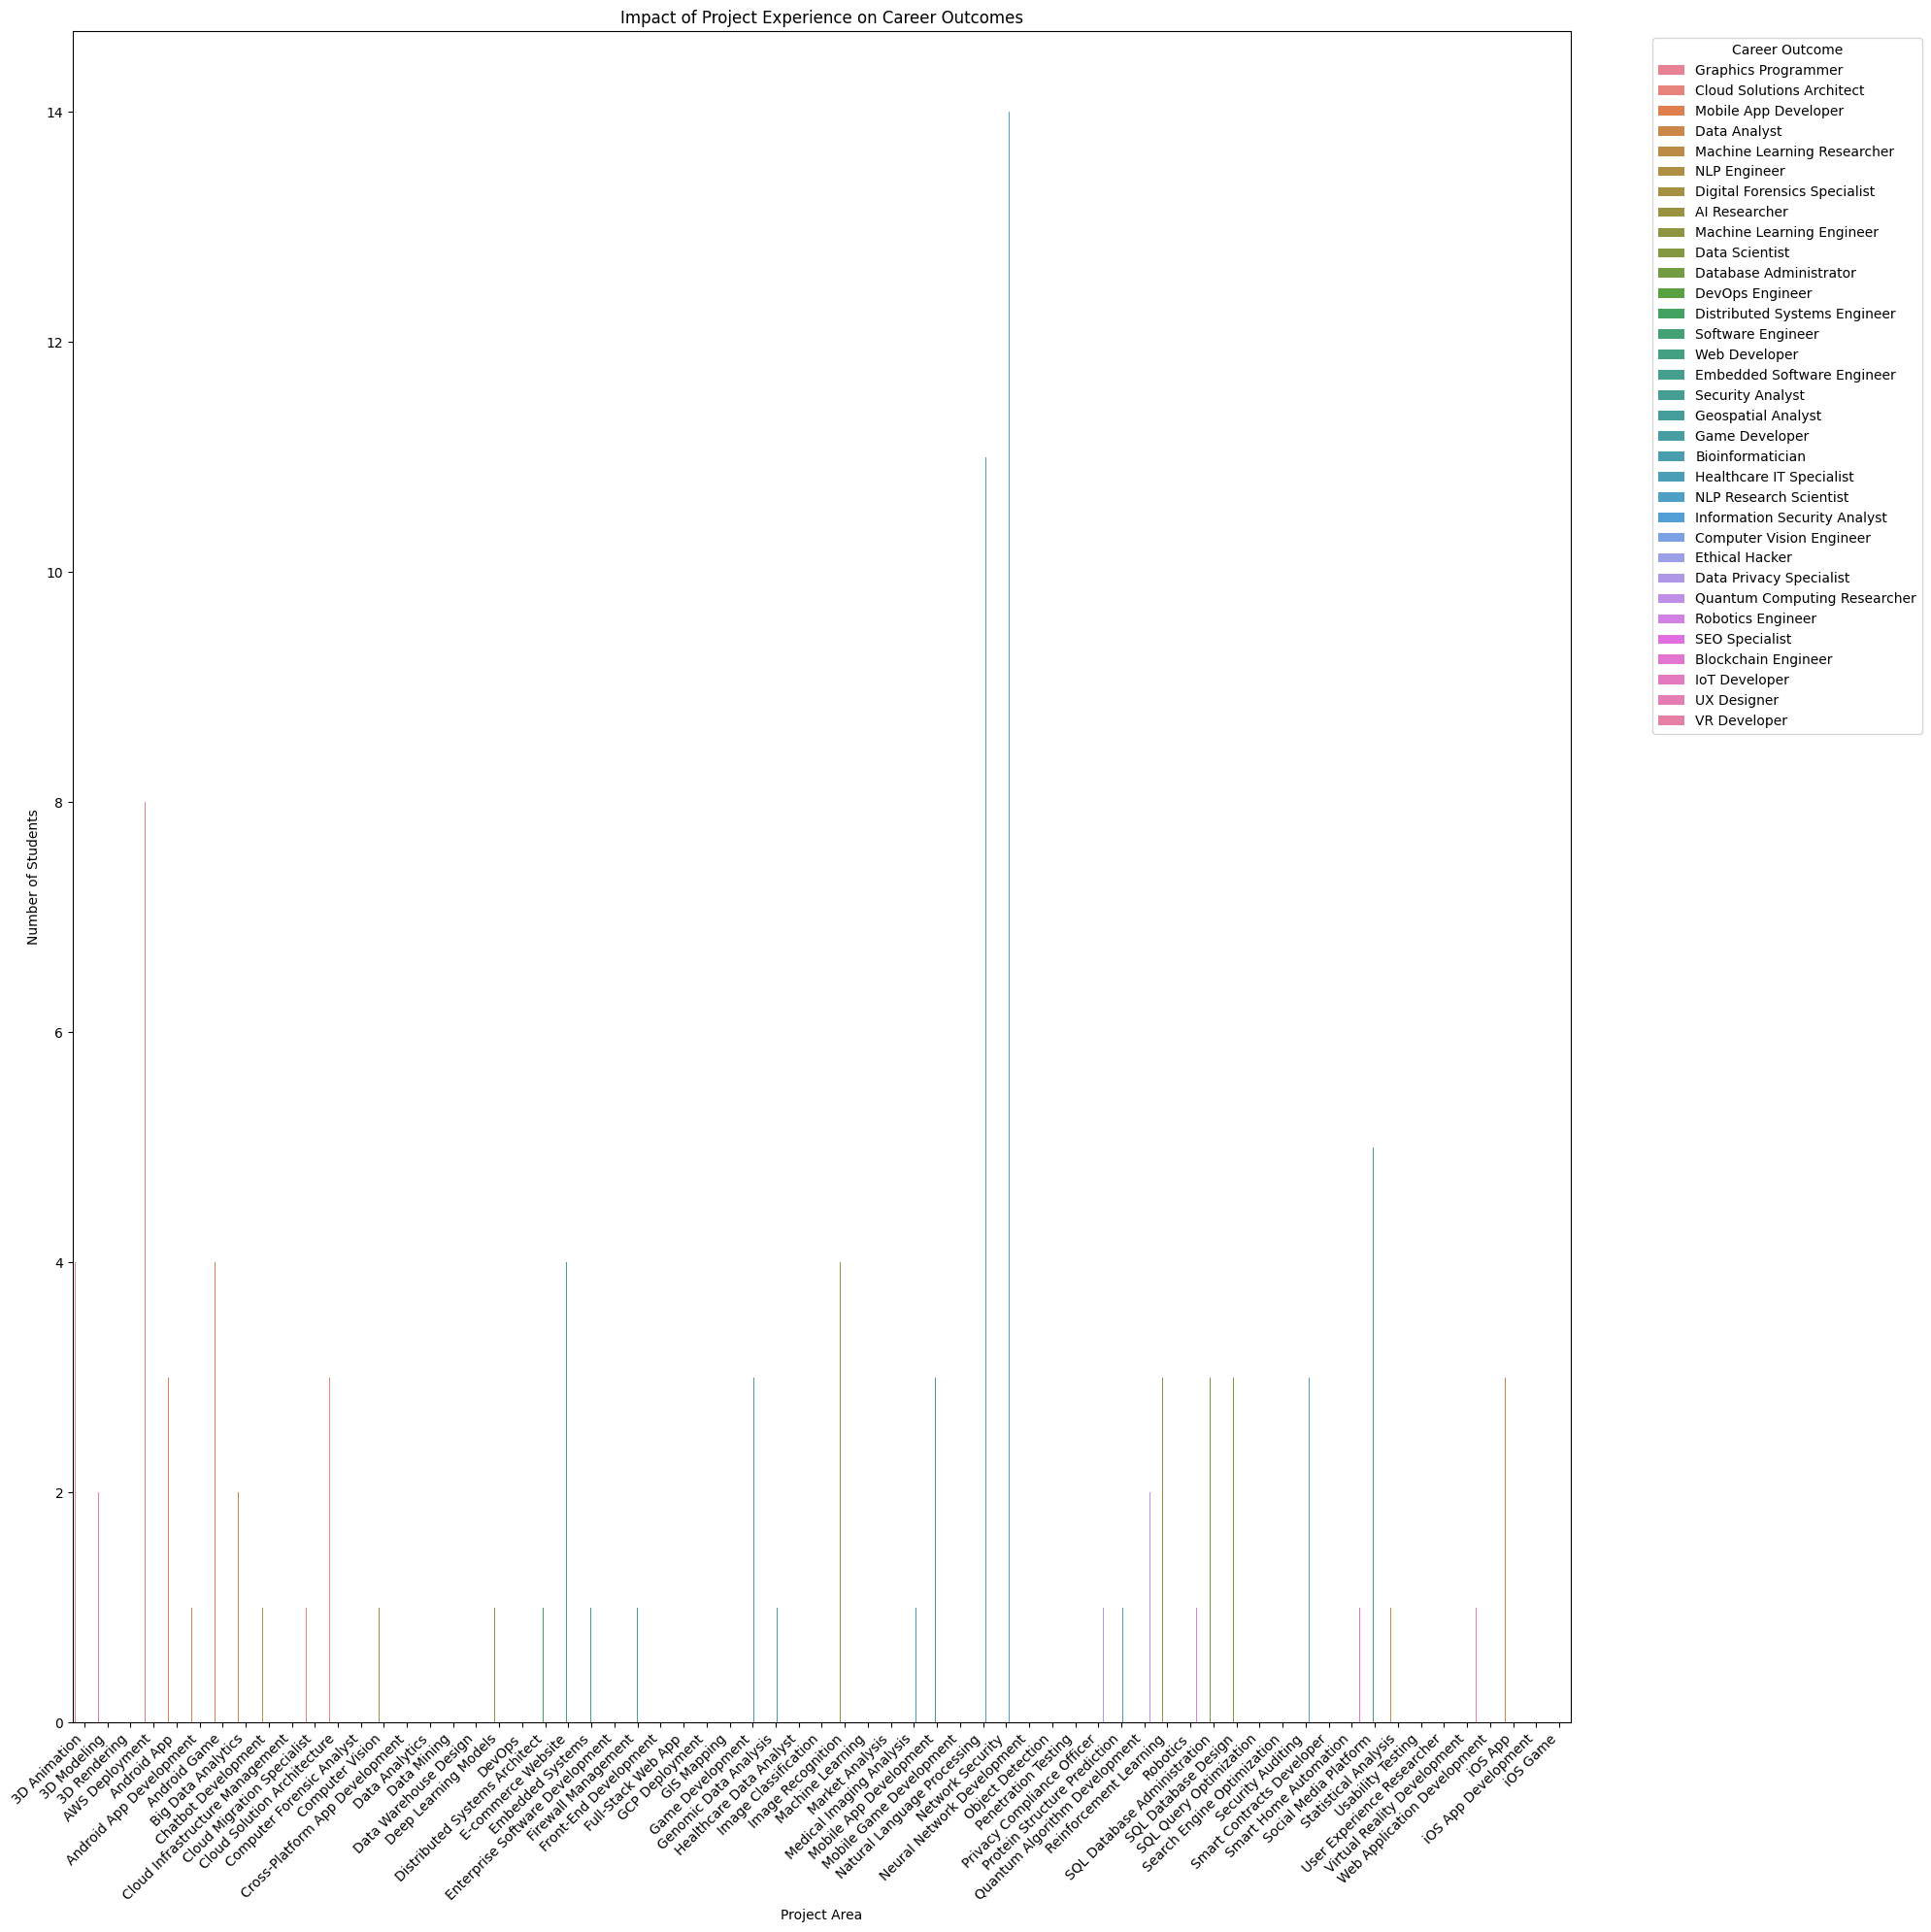

In [31]:
# First, we need to create a summary of the number of students by Project Area and Future Career
summary_df = df.groupby(['Projects', 'Future Career']).size().reset_index(name='Number_of_Students')

# Plot grouped bar chart
plt.figure(figsize=(20, 20))
sns.barplot(x='Projects', y='Number_of_Students', hue='Future Career', data=summary_df)
plt.title('Impact of Project Experience on Career Outcomes')
plt.xlabel('Project Area')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Career Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [32]:
px.parallel_categories(df, dimensions=["Future Career", "Python", "SQL", "Java"], title="Skill Proficiency Across Future Careers")

In [33]:
px.bar(df, x="Interested Domain", y="Projects", color="Gender", title="Projects Completed by Interested Domain", barmode="stack")

In [34]:
px.scatter(df, x="GPA", y="Future Career", color="Gender", size="Age", hover_data=['Name'], title="Future Career by GPA")

In [35]:
px.histogram(df, x="Age", color="Future Career", barmode="group", title="Distribution of Students by Age and Future Career")

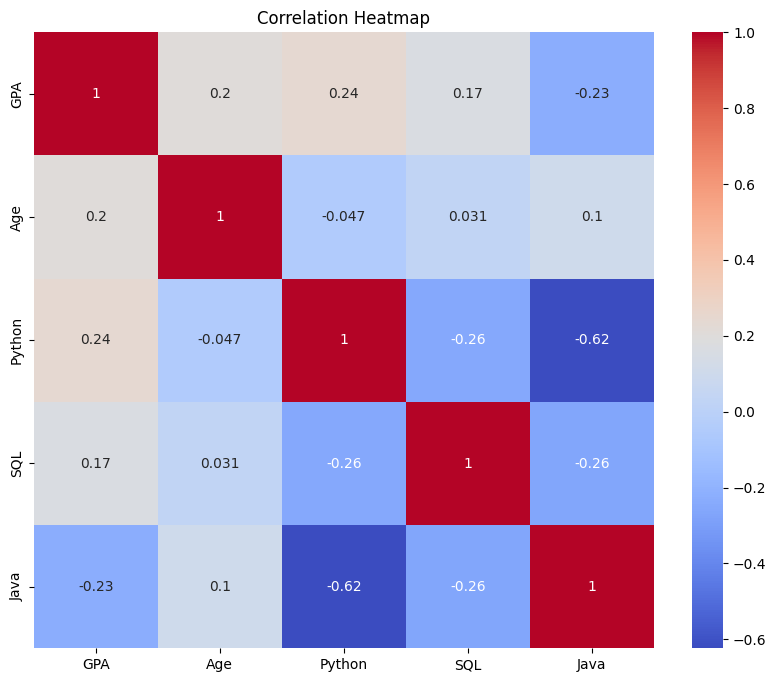

In [36]:
# Convert categorical skill levels to numeric values
skill_mapping = {'Strong': 3, 'Average': 2, 'Weak': 1}
df['Python'] = df['Python'].map(skill_mapping)
df['SQL'] = df['SQL'].map(skill_mapping)
df['Java'] = df['Java'].map(skill_mapping)

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[['GPA', 'Age', 'Python', 'SQL', 'Java']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Model Training

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

# Select the features and target variable
features = ['Age', 'GPA', 'Gender', 'Major', 'Interested Domain', 'Python', 'SQL', 'Java']
target = 'Future Career'

# Separate the features and target variable
X = df[features]
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessor
numeric_features = ['Age', 'GPA']
categorical_features = ['Gender', 'Major', 'Interested Domain', 'Python', 'SQL', 'Java']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8611111111111112
Classification Report:
                               precision    recall  f1-score   support

               AI Researcher       1.00      1.00      1.00         1
            Bioinformatician       0.00      0.00      0.00         1
   Cloud Solutions Architect       1.00      1.00      1.00         5
                Data Analyst       1.00      1.00      1.00         1
              Data Scientist       1.00      1.00      1.00         1
      Database Administrator       1.00      1.00      1.00         2
Distributed Systems Engineer       0.00      0.00      0.00         1
              Ethical Hacker       0.00      0.00      0.00         1
              Game Developer       1.00      1.00      1.00         1
         Graphics Programmer       0.33      1.00      0.50         1
    Healthcare IT Specialist       0.00      0.00      0.00         1
Information Security Analyst       0.67      1.00      0.80         2
               IoT Developer       0

C:\Users\rolex\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\rolex\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\rolex\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\rolex\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. U

## Prediction

In [39]:
import numpy as np

# Define the three test cases
test_cases = pd.DataFrame([
    [22, 3.8, 'Female', 'Computer Science', 'Artificial Intelligence', 'Yes', 'No', 'Yes'],
    [25, 3.2, 'Male', 'Computer Science', 'Robotics', 'Yes', 'Yes', 'No'],
    [20, 3.9, 'Female', 'Computer Science', 'Security', 'Yes', 'No', 'No']
], columns=['Age', 'GPA', 'Gender', 'Major', 'Interested Domain', 'Python', 'SQL', 'Java'])

# Make predictions on the test cases
predictions = pipeline.predict(test_cases)

# Display the predictions
for i, prediction in enumerate(predictions):
    print(f"Prediction for Case {i+1}: {prediction}")

Prediction for Case 1: AI Researcher
Prediction for Case 2: UX Designer
Prediction for Case 3: Software Engineer


### Findings

1. **Model Performance and Accuracy:**
   - The Random Forest Classifier model achieved an accuracy of **86.1%** on the test set. This reflects strong performance in predicting career outcomes based on features like age, GPA, gender, major, and proficiency in programming languages (Python, SQL, Java).
   - Key features such as GPA and the student’s "Interested Domain" were crucial in determining career paths. These factors significantly influenced the accuracy of predictions.

2. **Precision Issues:**
   - The model faced challenges with certain career paths due to class imbalance, resulting in low precision for categories with fewer samples. This indicates a need for additional data or techniques to balance the dataset for more accurate predictions across all career paths.

3. **Versatility:**
   - The model performed exceptionally well for careers like "Cloud Solutions Architect," "Machine Learning Engineer," and "Mobile App Developer," showcasing its ability to handle diverse features and provide relevant career guidance.

4. **Impact of Project Experience:**
   - Students tend to complete projects in areas related to their desired career paths. This alignment helps them develop specific skills that are valuable to employers, enhancing their career prospects and providing a competitive edge in the job market.

5. **Gender-Based Career Trends:**
   - The analysis did not reveal significant gender disparities in career outcomes. However, it was observed that a higher proportion of male students pursue careers as Software Engineers. This pattern suggests that while there may not be explicit gender biases, male students are more frequently aligned with this particular career trajectory.

### Conclusion

The project successfully utilized data analysis to predict career paths, analyze the impact of project experience, and examine gender-based career trends among computer science students.

- **Career Path Prediction:** The Random Forest Classifier model demonstrated strong performance in predicting future career paths with an accuracy of 86.1%. Key predictors such as GPA and career interests were vital in shaping accurate predictions. The model's ability to handle diverse features allowed for effective career guidance in many cases, although precision issues were noted for some underrepresented career paths.

- **Project Experience:** The analysis highlighted that students who align their project work with their career aspirations are better prepared for their desired roles. Practical experience in relevant project areas enhances students' skills and gives them a competitive advantage in the job market.

- **Gender Trends:** While no significant gender-based disparities were identified in career outcomes, the data revealed a trend where a majority of male students pursue careers as Software Engineers. This finding suggests a prevalent career trajectory among male students, which may warrant further investigation to understand underlying factors and ensure equitable opportunities.

Overall, the analysis provided valuable insights into the factors influencing career outcomes for computer science students. These findings can guide more targeted career planning and support initiatives, helping students navigate their career paths effectively and equitably.